## Table of Contents <a id="toc">

* [Other Investigations](#other)

## Initial Imports

In [3]:
import pandas as pd
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('poster')
%matplotlib inline

In [15]:
pwd

'/home/matt/Documents/Projects/WebDev/CoronaVirus'

## Reload

In [7]:
dir_ = '/home/matt/Documents/Projects/WebDev/mmitchell_net/FlaskApp/static/data/'
yesterday = datetime.now()-timedelta(1)
filename = 'Confirmed_Cases_through_{}.csv'.format(yesterday.strftime('%b%d'))
transformed = pd.read_csv(dir_+filename)
transformed.head()

,Province/State,Country/Region,Lat,Long,ConfirmedCases,Date
0,NaN,Thailand,15.0000,101.0000,2,2020-01-22
1,NaN,Japan,36.0000,138.0000,2,2020-01-22
2,NaN,Singapore,1.2833,103.8333,0,2020-01-22
3,NaN,Nepal,28.1667,84.2500,0,2020-01-22
4,NaN,Malaysia,2.5000,112.5000,0,2020-01-22


## Line Chart

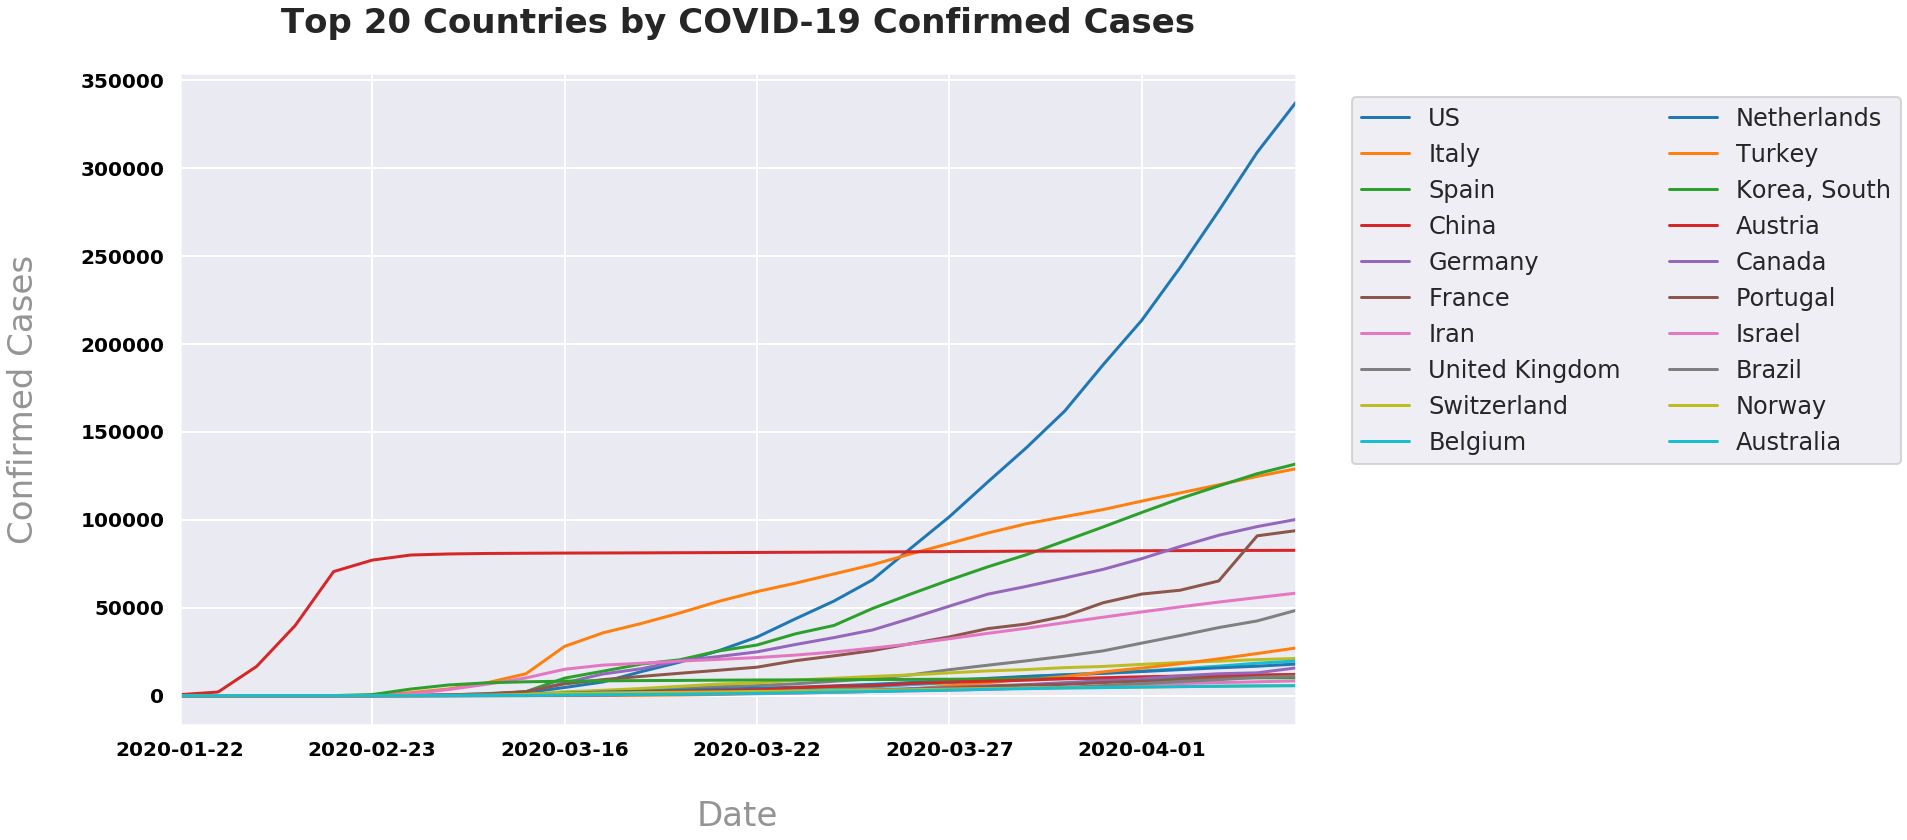

In [16]:
# byCountry = df.groupby('Country/Region')[dates].sum().transpose()
current = transformed[transformed['Date']=='2020-03-30']
curCountryTotals = current.groupby(['Country/Region'])['ConfirmedCases'].sum()
# top_25=byCountry.max().sort_values(ascending=False)[:20].index
top_10=curCountryTotals.sort_values(ascending=False)[:20].index

#If Country Total Exists, Remove BreakOuts
grouped = transformed.groupby(['Country/Region', 'Date'])['ConfirmedCases'].sum().reset_index()
byCountry = grouped.pivot(columns='Country/Region', index='Date', values='ConfirmedCases')
byCountry.at['2020-03-23', 'France'] = 19874 #Manually Fix France
byCountry[top_10].plot(kind='line', figsize=(20,12))
plt.legend(loc=(1.05,.4), fontsize='24', ncol=2)
plt.title("Top 20 Countries by COVID-19 Confirmed Cases", fontsize=34, weight='bold', pad=40)

plt.xticks(fontsize=20, color="black", weight='bold')
plt.yticks(fontsize=20, color="black", weight='bold');
plt.ylabel("Confirmed Cases", fontsize=34, labelpad=40, color='#949494')
plt.xlabel("Date", fontsize=34, labelpad=40, color='#949494')
filename = 'Line_Chart_by_Country_{}.png'.format(yesterday.strftime('%b%d'))
plt.savefig(filename, transparent=True, bbox_inches='tight')